In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
from IPython import display
display.clear_output()

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
# %cd {workingDir}
# !yolo task=detect mode=predict model=yolo11m.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,091,712 parameters, 0 gradients, 68.0 GFLOPs

100% 104k/104k [00:00<00:00, 117MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 2 backpacks, 62.4ms
Speed: 13.3ms preprocess, 62.4ms inference, 378.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# !pip install roboflow --quiet

# https://public.roboflow.com/object-detection/pothole/1

# from roboflow import Roboflow

## --- To fetch dataset from roboflow --- ##
# rf = Roboflow(api_key="lLc6eo6etzPTNVhEV9Jk")
# project = rf.workspace("brad-dwyer").project("pothole")
# version = project.version(1)
# dataset = version.download("yolov11")

# --- To mount google drive to fetch --- #
# from google.colab import drive
# drive.mount('/content/drive')



In [7]:
!yolo task=detect mode=train model=yolo11m.pt data=/content/data.yaml epochs=120 imgsz=640 plots=True

100% 38.8M/38.8M [00:00<00:00, 114MB/s]
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

### To View Trained Results:

In [9]:
from IPython.display import display, Image

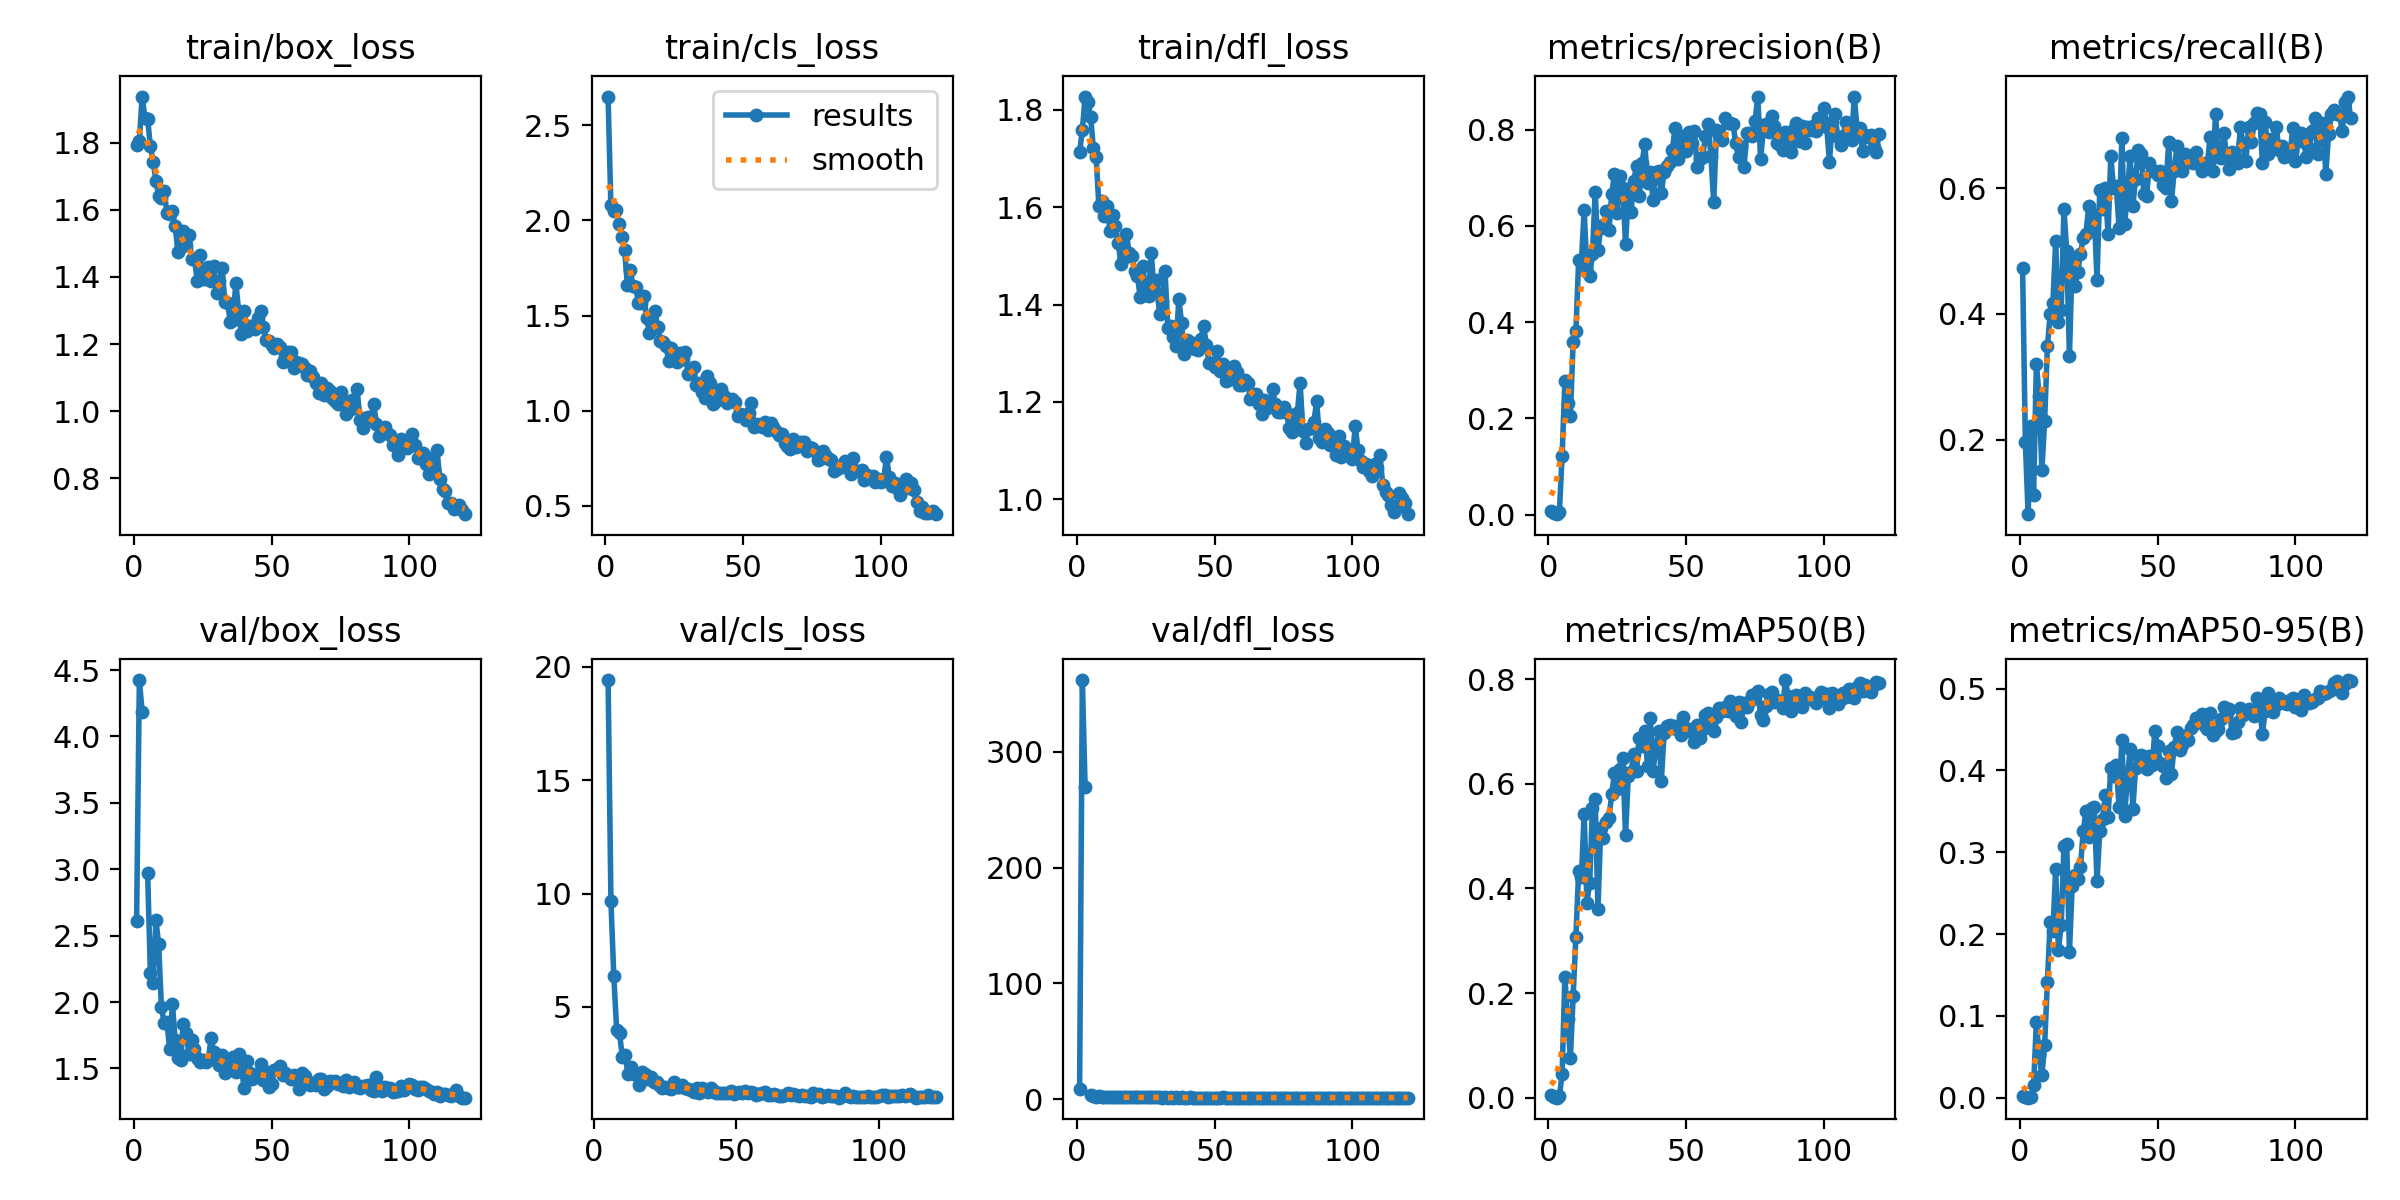

In [10]:
display(Image(filename='/content/runs/detect/train/results.png', width=700))

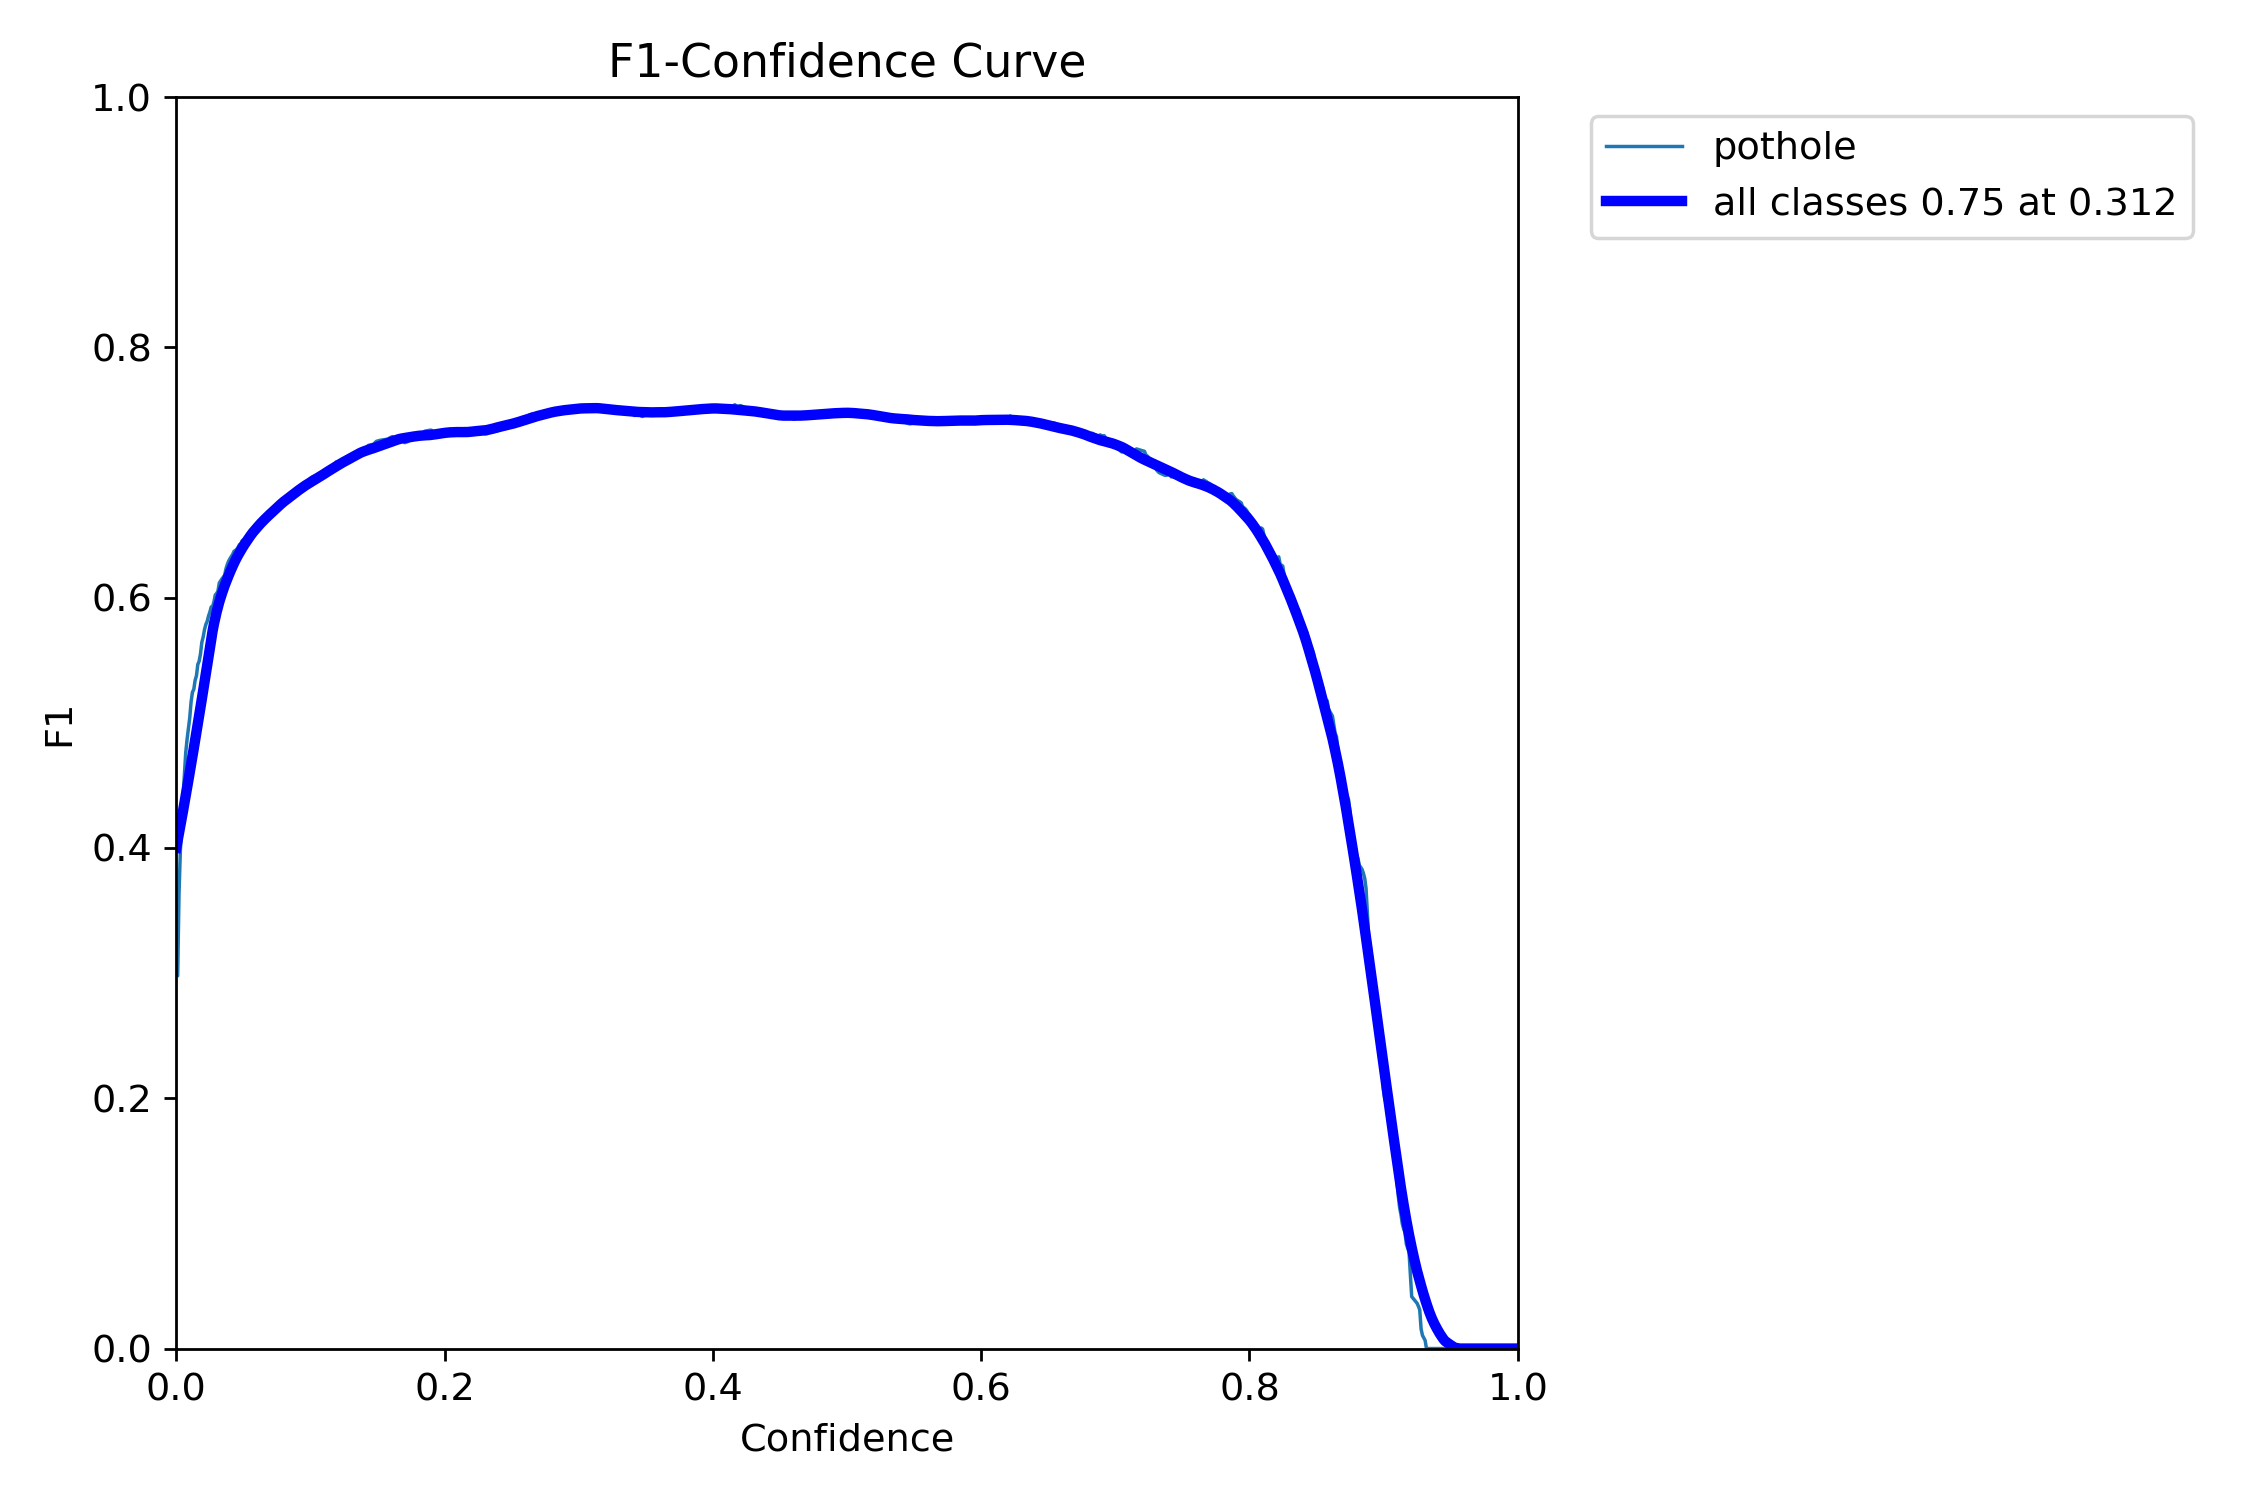

In [11]:
display(Image(filename='/content/runs/detect/train/F1_curve.png', width=500))

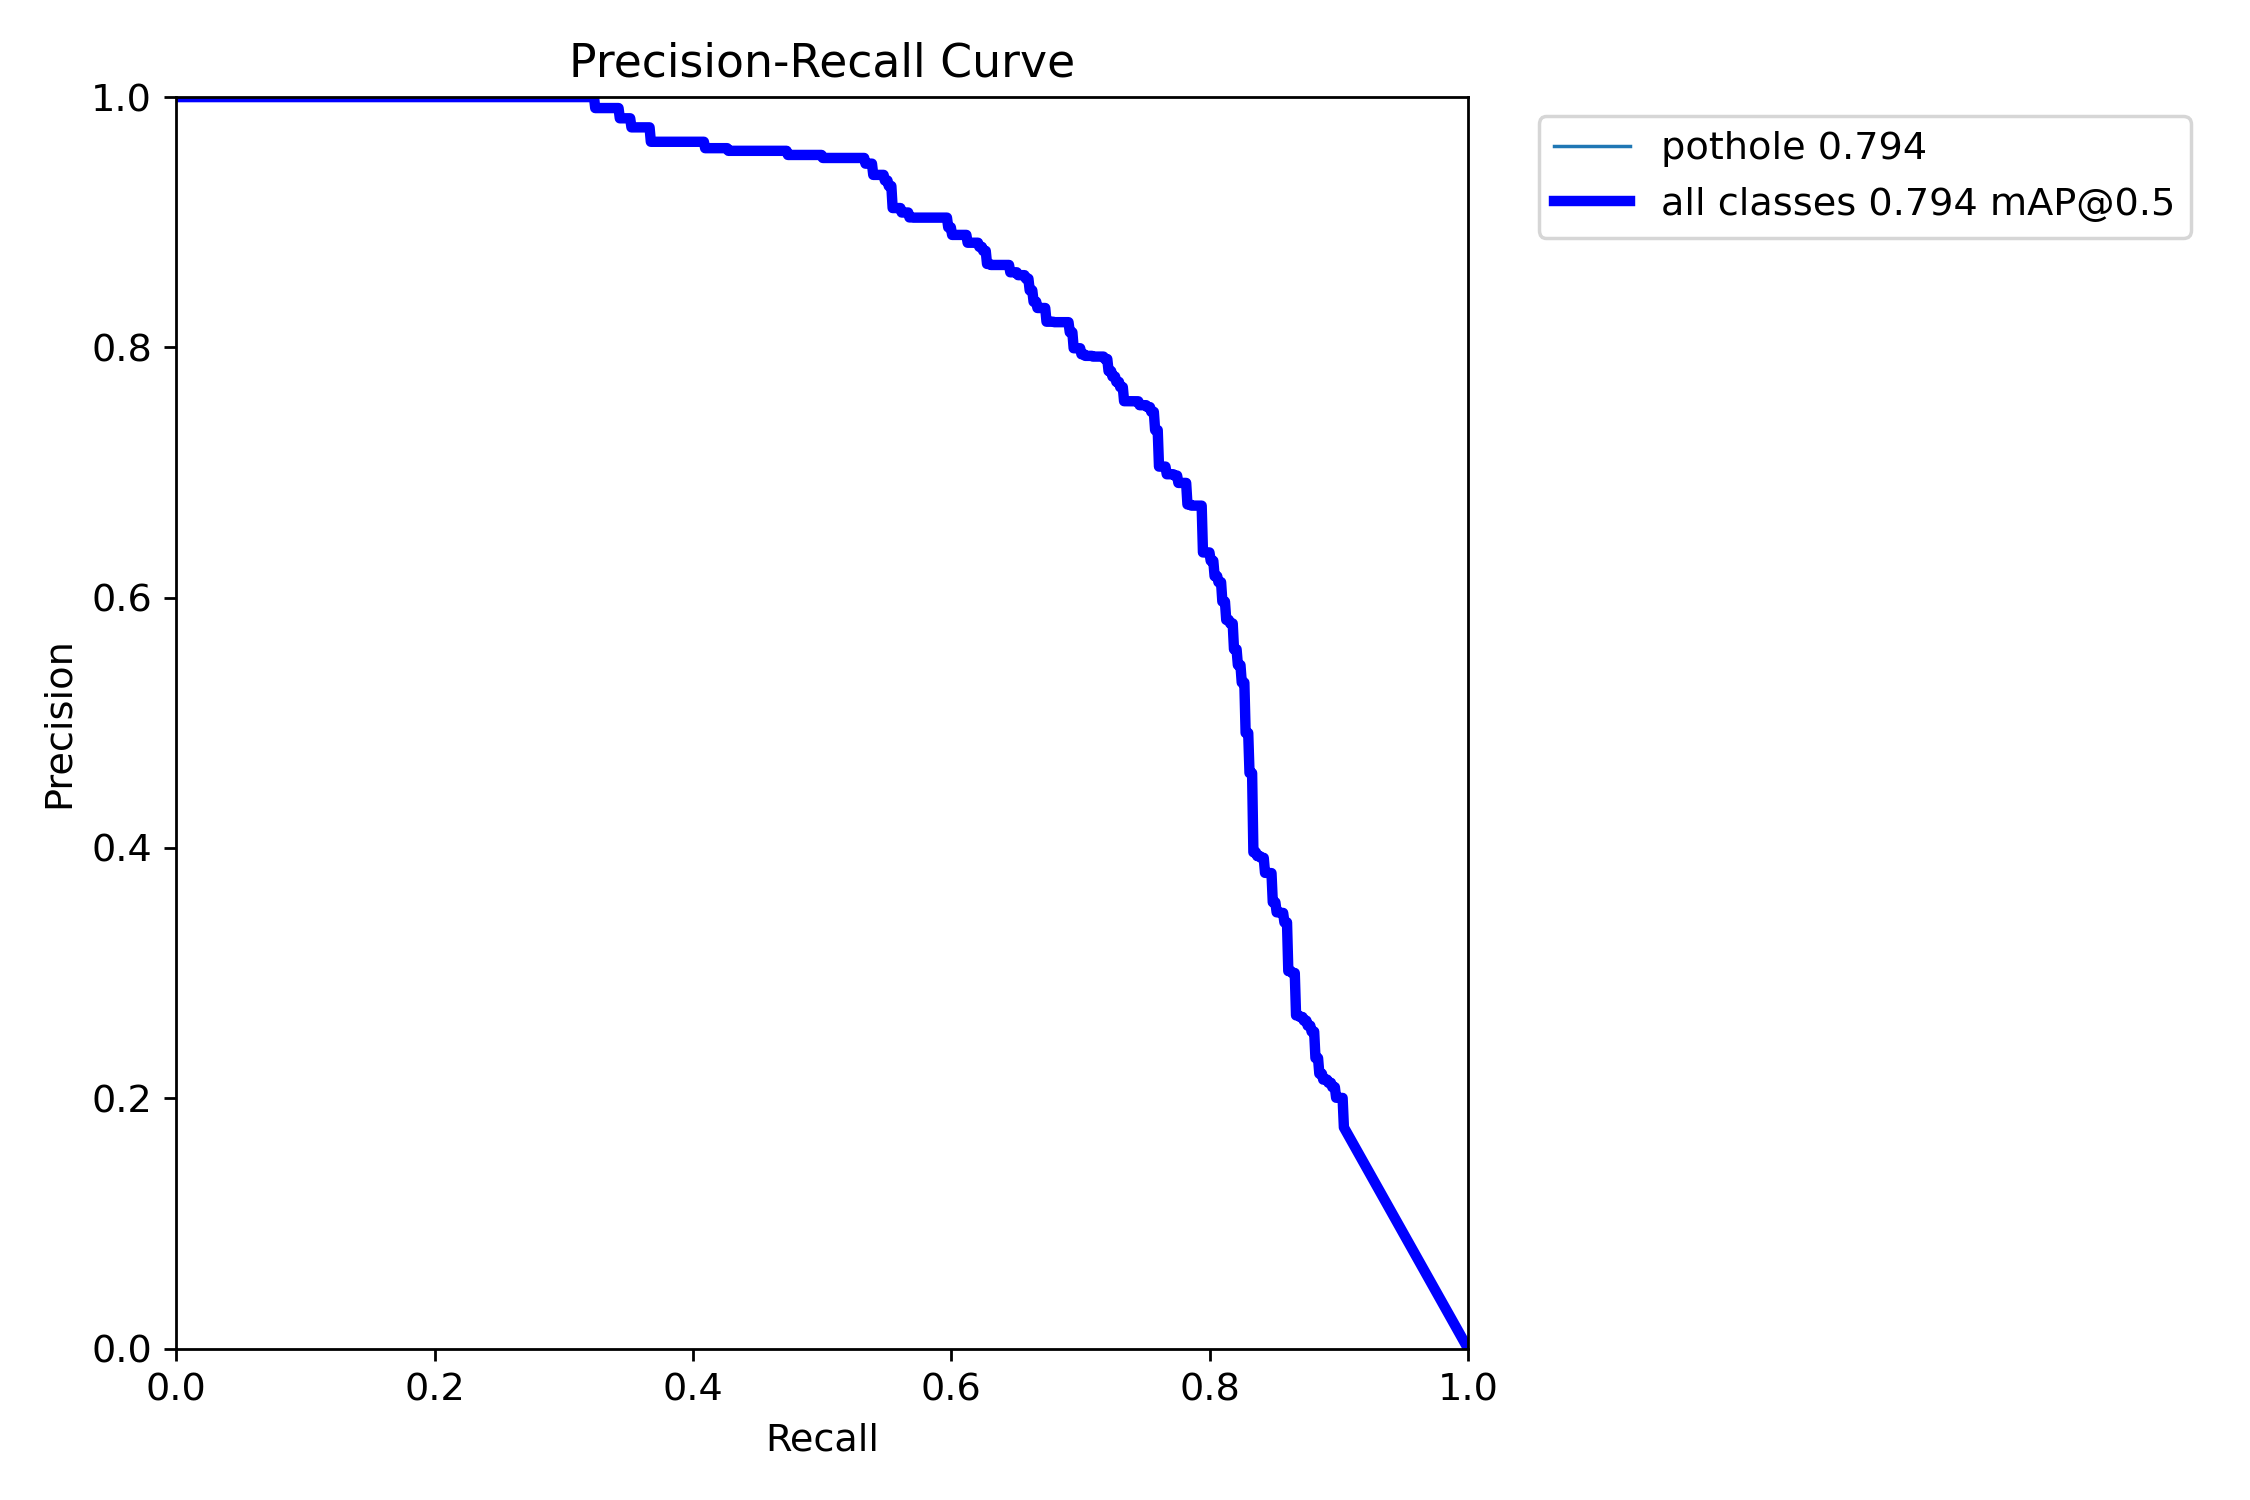

In [12]:
display(Image(filename='/content/runs/detect/train/PR_curve.png', width=500))

### Validate Fine-Tuned Model:

In [14]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Scanning /content/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:04<00:00,  2.08it/s]
                   all        133        330       0.78      0.727      0.793      0.512
Speed: 0.2ms preprocess, 23.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference/Predict with Trained/Validated Model:

In [15]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/test/images save=True

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs

image 1/67 /content/test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg: 640x640 1 pothole, 36.8ms
image 2/67 /content/test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg: 640x640 2 potholes, 36.9ms
image 3/67 /content/test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg: 640x640 1 pothole, 36.8ms
image 4/67 /content/test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg: 640x640 1 pothole, 36.8ms
image 5/67 /content/test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg: 640x640 1 pothole, 30.9ms
image 6/67 /content/test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg: 640x640 5 potholes, 25.2ms
image 7/67 /content/test/images/img-195_jpg.rf.f77a8f4d432a9a89235168ff8e09a650.jpg: 640x640 3 potholes, 25.2ms
image 8/67 /content/test/images/img-196_jpg.rf.c1e10

### To View the Predicted Images

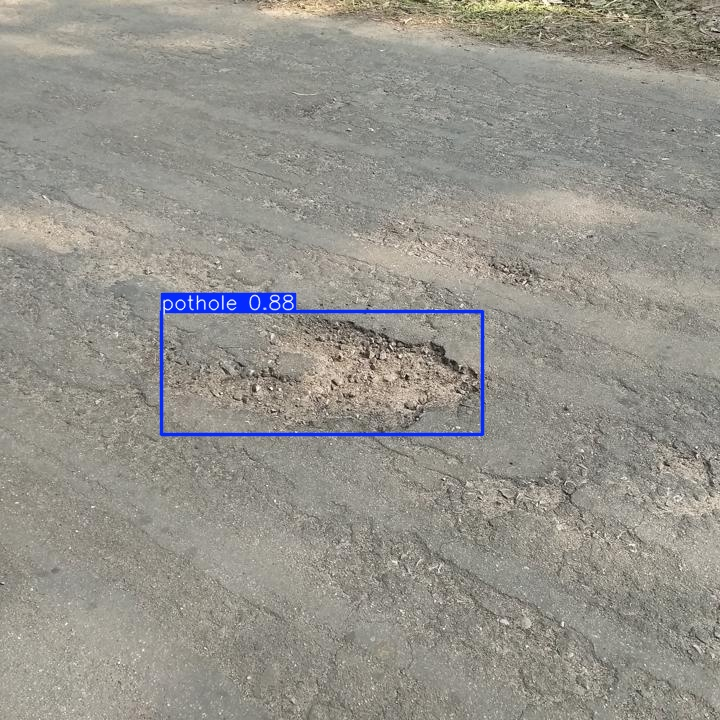

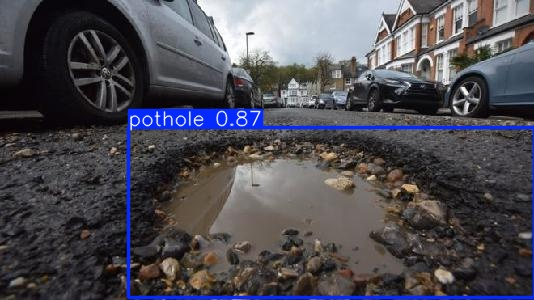

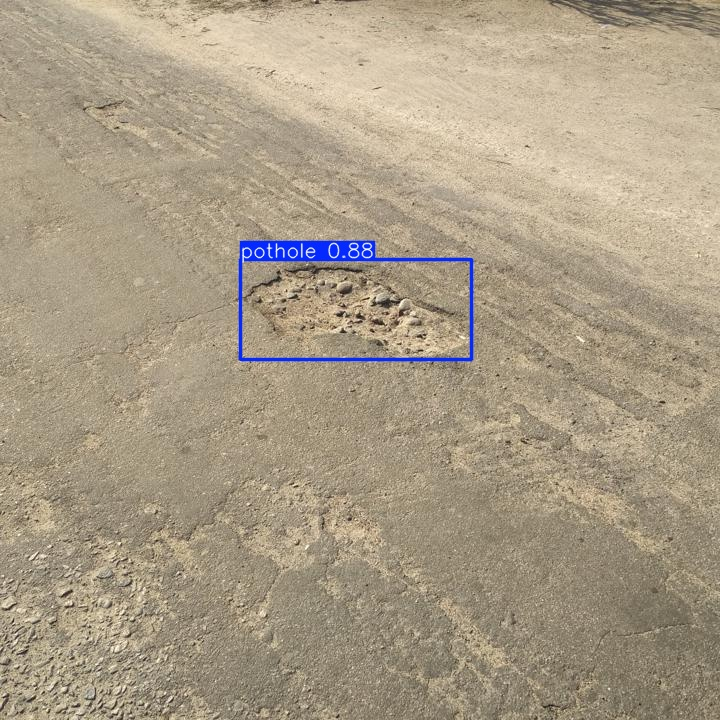

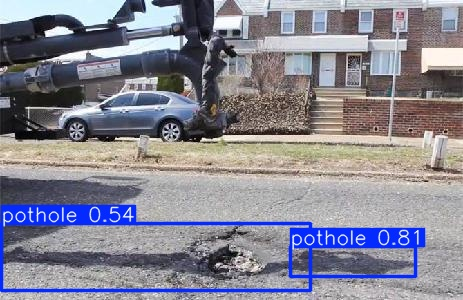

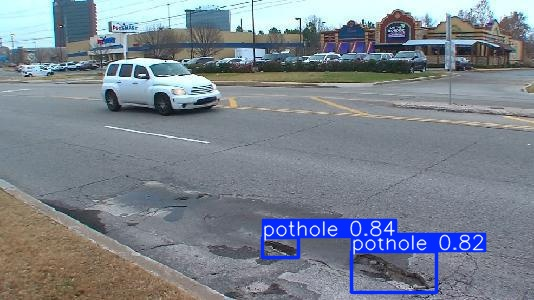

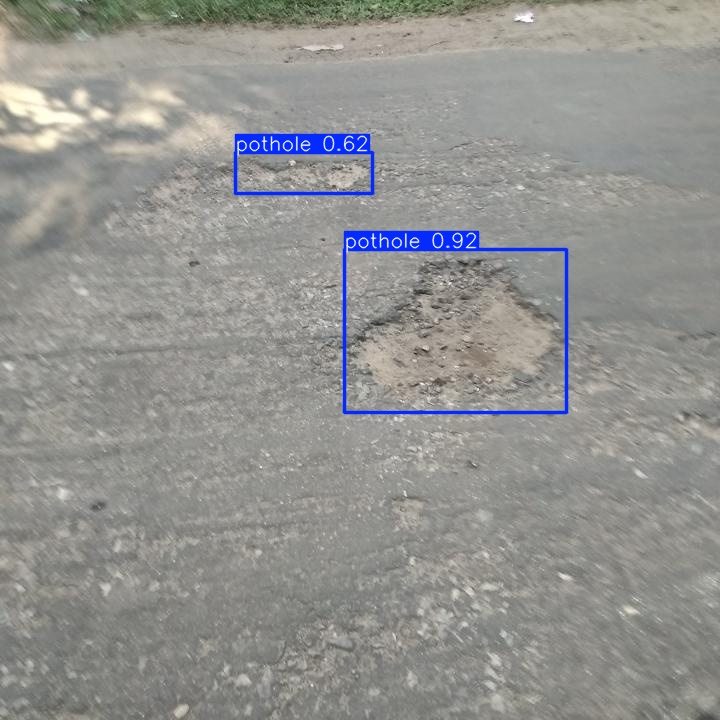

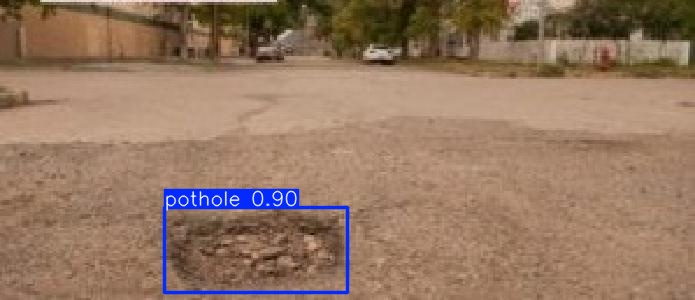

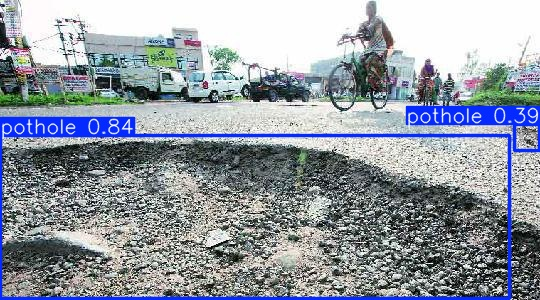

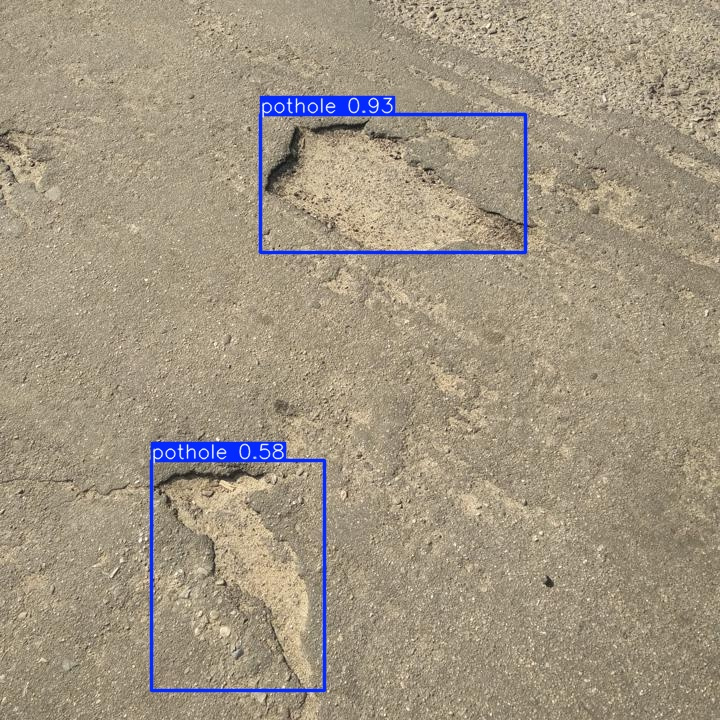

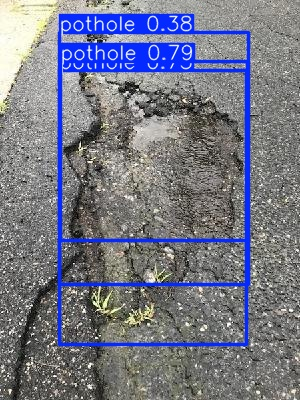

In [27]:
!pip install glob2

import glob2 as glob
import os

pred_images_annotated = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{pred_images_annotated}/*.jpg')[:10]:
  display(Image(filename=img, width=600))
  print('\n')